In [30]:
# df = pd.read_csv('Convolutional-Neural-Stock-Market-Technical-Analyser/data/aapl/AAPL.csv', sep = ',' \
#                  )
# dataset = df['Adj Close'].values
# df.head()

In [1]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
#from pandas import read_csv
import pandas as pd 
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), :]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
df = pd.read_csv('Convolutional-Neural-Stock-Market-Technical-Analyser/data/aapl/AAPL.csv', sep = ',' \
                 )
# dataset = df['Adj Close'].values
# dataset = dataset.astype('float32')
# dataset = dataset.reshape(-1, 1)
# date = df['Date'].values
# #date = date.astype('float32')
# date = date.reshape(-1, 1)



Using TensorFlow backend.


In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-01-02,0.486607,0.580357,0.482143,0.580357,0.522122,179527600
1,1998-01-05,0.589286,0.591518,0.542411,0.566964,0.510073,162968400
2,1998-01-06,0.569196,0.714286,0.526786,0.676339,0.608473,453118400
3,1998-01-07,0.671875,0.678571,0.618304,0.625000,0.562285,260405600
4,1998-01-08,0.622768,0.665179,0.604911,0.649554,0.584375,193505200


In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))


df['diff'] = df['High'] - df['Low']
def data_process(x):
    return scaler.fit_transform(x.astype('float32')).reshape(, 1)
dataset = np.array([df['Open'].values])
data_process(df['Open'].values)
#scaler.fit_transform(df['Open'].values.astype('float32').reshape(-1, 1))

ValueError: Expected 2D array, got 1D array instead:
array=[   0.48660699    0.58928603    0.56919599 ...,  151.77999878  153.80000305
  153.88999939].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

NameError: name 'dataset' is not defined

In [34]:
# create and fit the LSTM network
from keras import regularizers


model = Sequential()
model.add(LSTM(128, input_shape=(4, look_back), kernel_regularizer=regularizers.l2(1),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(1))



model.compile(loss='mean_absolute_percentage_error', optimizer='adam')
model.fit(trainX, trainY, epochs=40, batch_size=1000, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict_extended = np.zeros((len(trainPredict),3))
trainPredict_extended[:,-1] = trainPredict
trainPredict = scaler.inverse_transform(trainPredict_extended)[:,3]


Epoch 1/40
0s - loss: 99.1532
Epoch 2/40
0s - loss: 81.5437
Epoch 3/40
0s - loss: 73.5569
Epoch 4/40
0s - loss: 66.7997
Epoch 5/40
0s - loss: 58.9054
Epoch 6/40
0s - loss: 52.1684
Epoch 7/40
0s - loss: 45.9205
Epoch 8/40
0s - loss: 38.7607
Epoch 9/40
0s - loss: 31.6018
Epoch 10/40
0s - loss: 24.3801
Epoch 11/40
0s - loss: 17.0441
Epoch 12/40
0s - loss: 14.3727
Epoch 13/40
0s - loss: 16.9782
Epoch 14/40
0s - loss: 16.8710
Epoch 15/40
0s - loss: 13.8798
Epoch 16/40
0s - loss: 12.9049
Epoch 17/40
0s - loss: 13.9638
Epoch 18/40
0s - loss: 12.6164
Epoch 19/40
0s - loss: 12.7511
Epoch 20/40
0s - loss: 12.3152
Epoch 21/40
0s - loss: 12.0686
Epoch 22/40
0s - loss: 11.5561
Epoch 23/40
0s - loss: 11.2654
Epoch 24/40
0s - loss: 11.2184
Epoch 25/40
0s - loss: 11.2994
Epoch 26/40
0s - loss: 11.7097
Epoch 27/40
0s - loss: 11.3067
Epoch 28/40
0s - loss: 10.8932
Epoch 29/40
0s - loss: 10.7877
Epoch 30/40
0s - loss: 11.1114
Epoch 31/40
0s - loss: 10.9190
Epoch 32/40
0s - loss: 10.4778
Epoch 33/40
0s - 

In [35]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 0.00 RMSE
Test Score: 0.01 RMSE


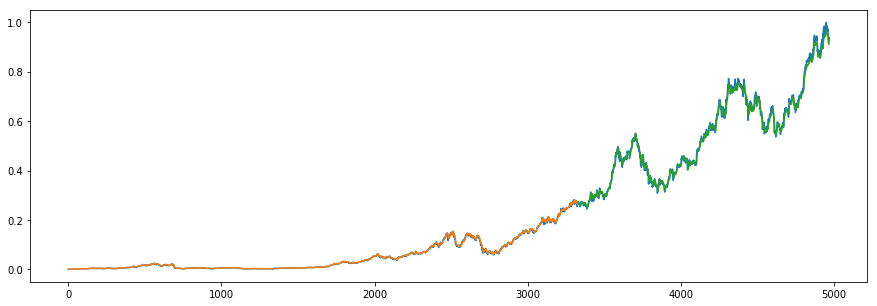

In [36]:
# shift train predictions for plotting

plt.figure(figsize = (15, 5))
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()

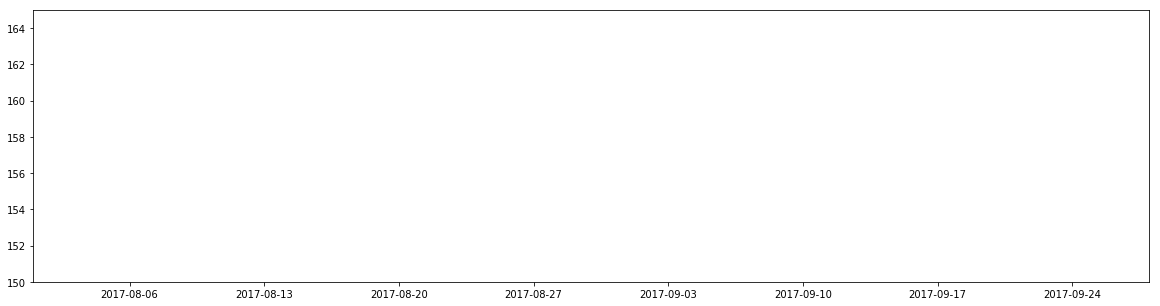

In [37]:
# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# # plot baseline and predictions
# date = pd.to_datetime(df.Date)
# plt.figure(figsize = (20, 5))
# plt.plot(date, scaler.inverse_transform(dataset), color = 'r')
# plt.plot(date[:len(trainPredictPlot)+1], trainPredictPlot, color = 'g')
# plt.plot(date[:len(testPredictPlot)+1], testPredictPlot, color = 'b')
# plt.xlim(('2017-08-01', '2017-09-28'))
# plt.ylim((150, 165))
# plt.show()

In [38]:
len(date)

4968